In [1165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.decomposition import PCA

# Problem Statement

COVID-19 pandemic has caused the entire world to lockdown, drastically changing our lives and negatively impacting world economy. Since the lockdown, we've learned that the virus is much more fatal to vulnerable populations such as the elderly and those with underlying medical conditions. Knowing how the virus spreads and who is particularly vulnerable to it can inform smart decision-making from the individual level all the way to government policy and legislation. This project is particularly directed at health officials and policy makers for maximum impact. We'll be looking at different demographic groups by age, sex, and race to see if any particular group is more vulnerable or more liable to spread COVID-19. 

# COVID Cases & Deaths Over Time

In [1166]:
covid = pd.read_csv('./data/us-counties.csv')

In [1167]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424611 entries, 0 to 424610
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    424611 non-null  object 
 1   county  424611 non-null  object 
 2   state   424611 non-null  object 
 3   fips    420389 non-null  float64
 4   cases   424611 non-null  int64  
 5   deaths  424611 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 19.4+ MB


In [1168]:
covid['date'] = pd.to_datetime(covid['date'])

Text(0.5, 1.0, 'Cases Over Time')

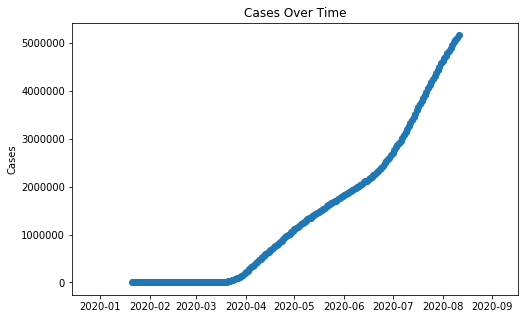

In [1169]:
#data over time
ot = covid.groupby('date')[['cases','deaths']].sum().sort_index() 

#cases over time
cases_ot = ot.groupby('date')['cases'].sum()

#plot cases over time
plt.figure(figsize = (8,5))
plt.scatter(cases_ot.index, cases_ot.values, label = 'cases')
plt.ylabel('Cases')
plt.title('Cases Over Time')

The rate of increase of case numbers have gone up over time as expected. Interestingly, there are periods of time where the rate of increase flatten. This may reflect policy changes that slowed the spread of COVID, such as lockdowns or masks.

Text(0.5, 1.0, 'Deaths Over Time')

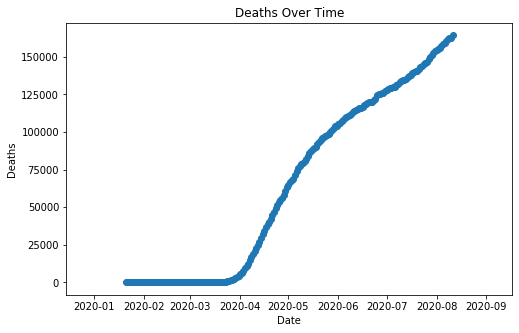

In [1170]:
# Deaths over time
deaths_ot = covid.groupby('date')['deaths'].sum()

# Plot Deaths Over Time
plt.figure(figsize = (8,5))
plt.scatter(deaths_ot.index, deaths_ot.values)
plt.ylabel('Deaths')
plt.xlabel('Date')
plt.title('Deaths Over Time')

Interestingly, the deaths due to COVID rose rapidly at first with the rate of deaths decreasingly slightly over time. 

Text(0.5, 1.0, 'Death Rate Estimate Over Time')

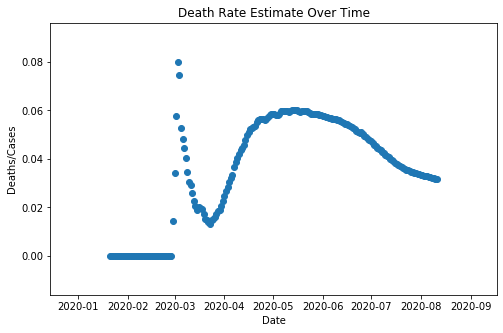

In [1171]:
# Cases/Deaths ratio over time
deaths_ot = covid.groupby('date')['deaths'].sum()/covid.groupby('date')['cases'].sum()

# Plot Deaths Over Time
plt.figure(figsize = (8,5))
plt.scatter(deaths_ot.index, deaths_ot.values)
plt.ylabel('Deaths/Cases')
plt.xlabel('Date')
plt.title('Death Rate Estimate Over Time')

Following the current trend, we can see that the true death rate is probably somewhere around 2-3%, which is what most experts have predicted.

# Demographics by County

In [1172]:
demo = pd.read_csv('./data/demographics.csv')
demo

,GEO_ID,NAME,DP05_0001E,DP05_0001M,DP05_0001PE,DP05_0001PM,DP05_0002E,DP05_0002M,DP05_0002PE,DP05_0002PM,...,DP05_0087PE,DP05_0087PM,DP05_0088E,DP05_0088M,DP05_0088PE,DP05_0088PM,DP05_0089E,DP05_0089M,DP05_0089PE,DP05_0089PM
0,id,Geographic Area Name,Estimate!!SEX AND AGE!!Total population,Margin of Error!!SEX AND AGE!!Total population,Percent Estimate!!SEX AND AGE!!Total population,Percent Margin of Error!!SEX AND AGE!!Total po...,Estimate!!SEX AND AGE!!Total population!!Male,Margin of Error!!SEX AND AGE!!Total population...,Percent Estimate!!SEX AND AGE!!Total populatio...,Percent Margin of Error!!SEX AND AGE!!Total po...,...,"Percent Estimate!!CITIZEN, VOTING AGE POPULATI...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citi...","Margin of Error!!CITIZEN, VOTING AGE POPULATIO...","Percent Estimate!!CITIZEN, VOTING AGE POPULATI...","Percent Margin of Error!!CITIZEN, VOTING AGE P...","Estimate!!CITIZEN, VOTING AGE POPULATION!!Citi...","Margin of Error!!CITIZEN, VOTING AGE POPULATIO...","Percent Estimate!!CITIZEN, VOTING AGE POPULATI...","Percent Margin of Error!!CITIZEN, VOTING AGE P..."
1,0500000US01103,"Morgan County, Alabama",119089,*****,119089,(X),59216,1009,49.7,0.8,...,88127,(X),42522,675,48.3,0.6,45605,695,51.7,0.6
2,0500000US06031,"Kings County, California",151366,*****,151366,(X),83591,899,55.2,0.6,...,95424,(X),53103,1500,55.6,1.0,42321,1332,44.4,1.0
3,0500000US06053,"Monterey County, California",435594,*****,435594,(X),221011,879,50.7,0.2,...,231021,(X),116568,3859,50.5,0.8,114453,3051,49.5,0.8
4,0500000US06057,"Nevada County, California",99696,*****,99696,(X),48808,1498,49.0,1.5,...,79698,(X),39033,1224,49.0,1.1,40665,1123,51.0,1.1
5,0500000US06089,"Shasta County, California",180040,*****,180040,(X),88679,794,49.3,0.4,...,136327,(X),66476,801,48.8,0.5,69851,1102,51.2,0.5
6,0500000US06115,"Yuba County, California",78041,*****,78041,(X),39819,876,51.0,1.1,...,52412,(X),25566,1269,48.8,1.6,26846,788,51.2,1.6
7,0500000US08035,"Douglas County, Colorado",342776,*****,342776,(X),171478,954,50.0,0.3,...,244138,(X),120673,1278,49.4,0.3,123465,1203,50.6,0.3
8,0500000US09001,"Fairfield County, Connecticut",943823,*****,943823,(X),459662,512,48.7,0.1,...,638490,(X),302720,3697,47.4,0.3,335770,3530,52.6,0.3
9,0500000US10001,"Kent County, Delaware",178550,*****,178550,(X),85805,1097,48.1,0.6,...,133448,(X),63439,1002,47.5,0.6,70009,1082,52.5,0.6


In [1173]:
# Reading in Demographics Census Data
demo = pd.read_csv('./data/demographics.csv')

# get only columns containing estimates
estimate_bool = demo.columns.str.endswith('E')
pestimate_bool = np.invert(demo.columns.str.endswith('PE'))
estimate_cols = list(demo.columns[estimate_bool & pestimate_bool])
relevant_cols = ['GEO_ID'] + estimate_cols

# Dataframe with only relevant cols
demo = demo[relevant_cols]

# Drop columns for race alone or in cominbation of one or more other races
demo = demo.drop(columns = demo.columns[65:71])

# column descriptions
pd.options.display.max_rows = 999
col_descriptions = demo.iloc[0,2:].str.split('!!').map(lambda x: x[-2]+'|'+x[-1])
col_descriptions

DP05_0001E                         SEX AND AGE|Total population
DP05_0002E                                Total population|Male
DP05_0003E                              Total population|Female
DP05_0004E    Total population|Sex ratio (males per 100 fema...
DP05_0005E                       Total population|Under 5 years
DP05_0006E                        Total population|5 to 9 years
DP05_0007E                      Total population|10 to 14 years
DP05_0008E                      Total population|15 to 19 years
DP05_0009E                      Total population|20 to 24 years
DP05_0010E                      Total population|25 to 34 years
DP05_0011E                      Total population|35 to 44 years
DP05_0012E                      Total population|45 to 54 years
DP05_0013E                      Total population|55 to 59 years
DP05_0014E                      Total population|60 to 64 years
DP05_0015E                      Total population|65 to 74 years
DP05_0016E                      Total po

Some of these columns are redundant and should be dropped

In [1174]:
# Dropping some extraneous columns
demo.drop(columns = demo.loc[:,'DP05_0026E':'DP05_0032E'].columns, inplace = True)

In [1175]:
demo.drop(columns = ['DP05_0033E', 'DP05_0087E', 'DP05_0088E', 'DP05_0089E'], inplace = True)

In [1176]:
# Extracting County ID
demo['fips'] = demo['GEO_ID'].str.split('US')[1:].map(lambda x:x[1]).astype(int)
# Extracting Country ID
demo['country_id'] = demo['GEO_ID'].str.split('US')[1:].map(lambda x:x[0]).astype(int)

# Droping row 0, which is just a description and dropping id after extracting county id and country id
demo = demo.drop(0, axis = 'rows')
demo = demo.drop(columns = 'GEO_ID')

# numerical cols of demo
demo_num = demo.loc[:,'DP05_0001E':'DP05_0086E']

# Get Number of Null Values by columns. Null values have a letter instead of a number
null_count = {col: demo_num[col].str.isalpha().sum() for col in demo_num.columns}

We'll drop any columns with null values greater than 100

In [1177]:
# get columns with null values greater than 100
cols_to_drop = [key for key, val in null_count.items() if val > 100]
# drop those columns
demo.drop(columns = cols_to_drop,inplace = True)

In [1178]:
# convert columns to float
for col in demo.loc[:,'DP05_0001E':'DP05_0086E'].columns:
    demo.loc[demo[col] == 'N', col] = np.nan
    demo[col] = demo[col].astype(float)

In [1179]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 1 to 838
Data columns (total 52 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NAME        838 non-null    object 
 1   DP05_0001E  838 non-null    float64
 2   DP05_0002E  838 non-null    float64
 3   DP05_0003E  838 non-null    float64
 4   DP05_0004E  838 non-null    float64
 5   DP05_0005E  838 non-null    float64
 6   DP05_0006E  838 non-null    float64
 7   DP05_0007E  838 non-null    float64
 8   DP05_0008E  838 non-null    float64
 9   DP05_0009E  838 non-null    float64
 10  DP05_0010E  838 non-null    float64
 11  DP05_0011E  838 non-null    float64
 12  DP05_0012E  838 non-null    float64
 13  DP05_0013E  838 non-null    float64
 14  DP05_0014E  838 non-null    float64
 15  DP05_0015E  838 non-null    float64
 16  DP05_0016E  838 non-null    float64
 17  DP05_0017E  838 non-null    float64
 18  DP05_0018E  838 non-null    float64
 19  DP05_0019E  838 non-null    f

Null values are fairly minimal

In [1180]:
# Combine COVID data with demographic data
covid_demo = pd.merge(covid, demo, on = 'fips')
covid_demo.drop(columns = 'NAME', inplace = True)

covid_demo.set_index('date', inplace=True)

covid_demo.shape

(123534, 55)

In [1181]:
# Investigate Null Values
nulls.isnull().sum()

county           0
state            0
fips             0
cases            0
deaths           0
DP05_0001E       0
DP05_0002E       0
DP05_0003E       0
DP05_0004E       0
DP05_0005E       0
DP05_0006E       0
DP05_0007E       0
DP05_0008E       0
DP05_0009E       0
DP05_0010E       0
DP05_0011E       0
DP05_0012E       0
DP05_0013E       0
DP05_0014E       0
DP05_0015E       0
DP05_0016E       0
DP05_0017E       0
DP05_0018E       0
DP05_0019E       0
DP05_0020E       0
DP05_0021E       0
DP05_0022E       0
DP05_0023E       0
DP05_0024E       0
DP05_0025E       0
DP05_0026E       0
DP05_0027E       0
DP05_0028E       0
DP05_0029E       0
DP05_0030E       0
DP05_0031E       0
DP05_0032E       0
DP05_0033E       0
DP05_0034E    5081
DP05_0035E    5081
DP05_0036E    5081
DP05_0037E    5081
DP05_0038E    5081
DP05_0039E    5081
DP05_0044E    5081
DP05_0052E    5081
DP05_0057E    5081
DP05_0058E    5081
DP05_0063E       0
DP05_0070E       0
DP05_0071E       0
DP05_0076E       0
DP05_0077E  

# Data Processing

Since the COVID data is comulative, we're going to work with the most recent data, which is 8/11/2020. For each population group, we're going to divide the subgroup population number by the total population number. This ensures that there is no correlation to the total population. 

In [1182]:
# Retrieving the latest update on cases and deaths (Aug 11, 2020)
data = covid_demo[covid_demo.index == '2020-08-11'].dropna()

In [1183]:
# # features pertaining to groups within the population. Most features will be left out due to dependence on other features.
# sub_population = ['DP05_0002E', 'DP05_0003E', 'DP05_0005E', 'DP05_0006E', 'DP05_0007E', 'DP05_0008E',
#                   'DP05_0009E', 'DP05_0010E', 'DP05_0011E', 'DP05_0012E', 'DP05_0013E', 'DP05_0014E', 
#                   'DP05_0015E', 'DP05_0037E', 'DP05_0038E', 'DP05_0044E', 'DP05_0052E', 'DP05_0076E', 'DP05_0086E']
sub_population = list(data.loc[:, 'DP05_0001E':'DP05_0086E'].columns)

In [1184]:
modeling_data = data[sub_population].copy()

In [1185]:
# Divide each column by the total population in order to get a ratio
# for col in modeling_data.columns:
#     modeling_data[col] /= data['DP05_0001E']

In [1186]:
# adding total population do dataframe
modeling_data['DP05_0001E'] = data['DP05_0001E']

In [1187]:
# dictionary for renaming columns
rename_dict = {key: val.split('|')[1] for key, val in col_descriptions.items()}

In [1188]:
modeling_data.rename(columns = rename_dict, inplace = True)

In [1189]:
# adding state
modeling_data['state'] = data['state']
# adding cases
modeling_data['cases'] = data['cases']
# adding deaths
modeling_data['deaths'] = data['deaths']

Since the point of the model is interpretation rather than prediction, I will include lagged data as a feature.

In [1190]:
# get number of cases from a day before
cases_lag = covid_demo[covid_demo.index == '2020-08-10'].dropna()['cases']
# add to our dataframe
modeling_data['cases_lag1'] = cases_lag.values

In [1191]:
# dummify categorical columns
modeling_data = pd.get_dummies(modeling_data)

In [1192]:
# Drop 'state_Ohio'. Coefficients for each state will be interpreted with respect to Ohio
modeling_data.drop(columns = 'state_Ohio', inplace = True)

In [1193]:
modeling_data[['cases','deaths']].describe()

,cases,deaths
count,773.000000,773.000000
mean,5481.556274,162.897801
std,13163.200811,401.665256
min,33.000000,0.000000
25%,897.000000,15.000000
50%,1934.000000,45.000000
75%,5106.000000,121.000000
max,211808.000000,5057.000000


# Baseline Model

The simplest model we can make is to use the total population of each county as our single feature. We'll use the results of this model for comparison with more complex models later on.

## Predicting Cases

In [1194]:
y = modeling_data['cases']
X = modeling_data[['Total population']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

model = sm.OLS(y_train, sm.add_constant(X_train))
res = model.fit()

preds = res.predict(sm.add_constant(X_test))
print('R2:', r2_score(y_test, preds))
print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))
res.summary()

R2: 0.7336189734307699
RMSE: 3978.5580409326008


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     3871.
Date:                Tue, 08 Sep 2020   Prob (F-statistic):          4.39e-258
Time:                        23:25:33   Log-Likelihood:                -5779.2
No. Observations:                 579   AIC:                         1.156e+04
Df Residuals:                     577   BIC:                         1.157e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1599.5204    246.955     -6.477      0.000   -2084.561   -1114.480
Total population     0.0070      0.000     62.225      0.000       0.007       0.007
Total population     0.0070      0.000     62.219      0.000       0.007       0.007
Total population     0.0070      0.000     62.219      0.000       0.007       0.007
==============================================================================
Omnibus:                      696.350   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           225057.614
Skew:                           5.256   Prob(JB):                         0.00
Kurtosis:                      99.012   Cond. No.                     4.74e+31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.08e-49. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

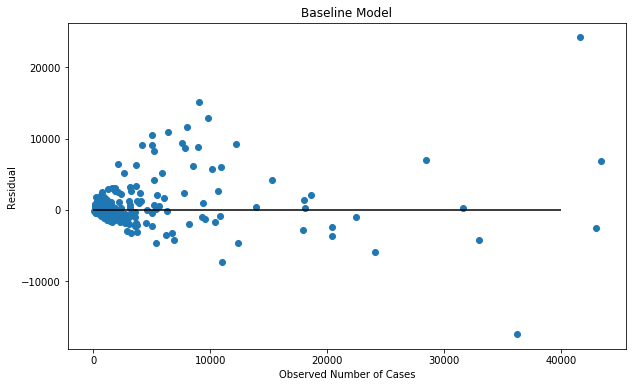

In [1195]:
plt.figure(figsize=(10,6))
resids = preds - y_test
plt.scatter(y_test, resids)
plt.title('Baseline Model')
plt.ylabel('Residual')
plt.xlabel('Observed Number of Cases')
plt.hlines(y = 0, xmin = 0, xmax = 40000)

Residuals look evenly distributed.

## Predicting Deaths

In [1196]:
y = modeling_data['deaths']
X = modeling_data[['Total population']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

model = sm.OLS(y_train, sm.add_constant(X_train))
res = model.fit()

preds = res.predict(sm.add_constant(X_test))
print('R2:', r2_score(y_test, preds))
print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))
res.summary()

R2: 0.4418176409995078
RMSE: 249.33547231625917


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deaths   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     1178.
Date:                Tue, 08 Sep 2020   Prob (F-statistic):          1.62e-141
Time:                        23:25:34   Log-Likelihood:                -3999.1
No. Observations:                 579   AIC:                             8002.
Df Residuals:                     577   BIC:                             8011.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -22.0421     11.412     -1.932      0.054     -44.456       0.371
Total population     0.0002   5.23e-06     34.329      0.000       0.000       0.000
Total population     0.0002   5.23e-06     34.325      0.000       0.000       0.000
Total population     0.0002   5.23e-06     34.325      0.000       0.000       0.000
==============================================================================
Omnibus:                      487.138   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16838.317
Skew:                           3.473   Prob(JB):                         0.00
Kurtosis:                      28.490   Cond. No.                     4.74e+31
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.08e-49. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0.5, 0, 'Observed Number of Deaths')

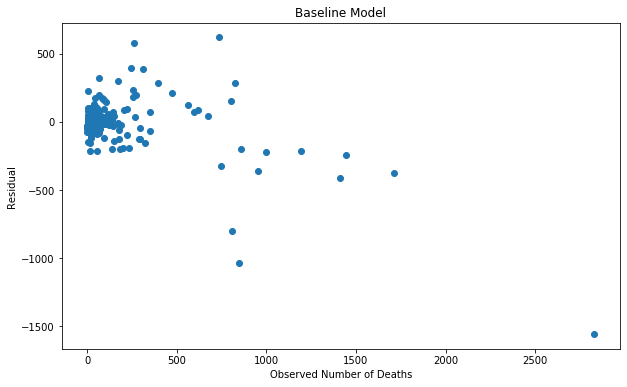

In [1225]:
plt.figure(figsize=(10,6))
resids = preds - y_test
plt.scatter(y_test, resids)
plt.title('Baseline Model')
plt.ylabel('Residual')
plt.xlabel('Observed Number of Deaths')

Not great. But this is a baseline model.

# First Model using StatsModels

For the first model, we will use most of our features in order to make a prediction of the number of cases and the number of deaths. Will drop some columns due to their dependence on some other columns.

## Predicting Cases

In [1198]:
y = modeling_data['cases']
X = modeling_data.drop(columns = ['cases', 'cases_lag1', 'deaths', 'Under 18 years', '16 years and over',
                                 '21 years and over', '62 years and over', '65 years and over', '18 years and over', 
                                  'Sex ratio (males per 100 females)', 'One race', 'Median age (years)', 
                                  'Total population', 'Not Hispanic or Latino', 'White alone',
                                 ])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [1199]:
model = sm.OLS(y_train, sm.add_constant(X_train))
res = model.fit()

In [1200]:
preds = res.predict(sm.add_constant(X_test))
print('R2:', r2_score(y_test, preds))
print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))

R2: 0.8544900341442196
RMSE: 2940.4948519150403


In [1201]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     213.9
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:25:34   Log-Likelihood:                -5338.3
No. Observations:                 579   AIC:                         1.084e+04
Df Residuals:                     498   BIC:                         1.119e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                        -1163.5307    623.652     -1.866      0.063   -2388.844      61.782
Male                                                            -0.1404      0.083     -1.688      0.092      -0.304       0.023
Female                                                          -0.0323      0.085     -0.381      0.704      -0.199       0.134
Under 5 years                                                    0.1684      0.111      1.516      0.130      -0.050       0.387
5 to 9 years                                                    -0.1071      0.087     -1.226      0.221      -0.279       0.064
10 to 14 years                                                  -0.1594      0.080     -1.987      0.047      -0.317      -0.002
15 to 19 years                                                  -0.0795      0.085     -0.936      0.350      -0.246       0.087
20 to 24 years                                                  -0.0264      0.044     -0.594      0.553      -0.114       0.061
25 to 34 years                                                   0.0393      0.031      1.255      0.210      -0.022       0.101
35 to 44 years                                                  -0.1386      0.054     -2.583      0.010      -0.244      -0.033
45 to 54 years                                                   0.3795      0.062      6.158      0.000       0.258       0.501
55 to 59 years                                                  -0.1501      0.078     -1.925      0.055      -0.303       0.003
60 to 64 years                                                  -0.4040      0.079     -5.100      0.000      -0.560      -0.248
65 to 74 years                                                  -0.0156      0.068     -0.231      0.817      -0.148       0.117
75 to 84 years                                                   0.1331      0.082      1.628      0.104      -0.028       0.294
85 years and over                                                0.1875      0.097      1.939      0.053      -0.002       0.377
Two or more races                                                0.1219      0.066      1.842      0.066      -0.008       0.252
White                                                            0.1191      0.094      1.269      0.205      -0.065       0.304
Black or African American                                        0.4508      0.120      3.760      0.000       0.215       0.686
American Indian and Alaska Native                                0.2227      0.157      1.420      0.156      -0.086       0.531
Asian                                                           -1.3105      0.439     -2.983      0.003      -2.174

Some inferences:

- Counties in New Mexico, Puerto Rico tend to have few cases
- Counties in Louisiana have high cases

In [1202]:
# County cases in New Mexico
modeling_data[modeling_data['state_New Mexico'] == 1]['cases']

date
2020-08-11    5196
2020-08-11     659
2020-08-11    1142
2020-08-11    2528
2020-08-11    4067
2020-08-11     834
2020-08-11    3064
2020-08-11     457
2020-08-11    1103
Name: cases, dtype: int64

In [1226]:
# county cases in Louisiana
modeling_data[modeling_data['state_Louisiana'] == 1]['cases']

date
2020-08-11    15452
2020-08-11    10805
2020-08-11     6739
2020-08-11     5323
2020-08-11     3072
2020-08-11     2374
2020-08-11     2863
2020-08-11     2930
2020-08-11    12377
2020-08-11     6862
2020-08-11     2561
2020-08-11     7723
2020-08-11     2975
2020-08-11     3327
2020-08-11     3540
2020-08-11     4923
Name: cases, dtype: int64

Looking at the data, we can see that Louisiana generally has higher cases compared to New Mexico.

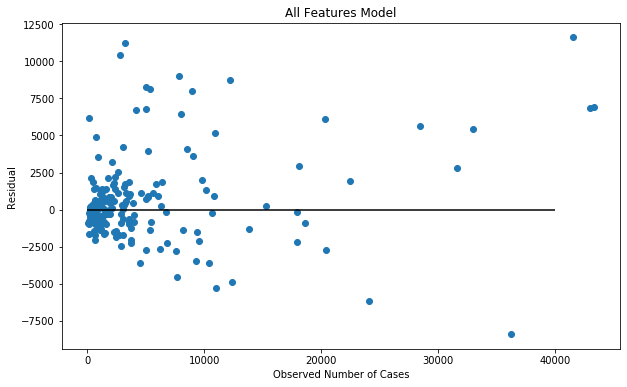

In [1204]:
plt.figure(figsize=(10,6))
resids = preds - y_test
plt.scatter(y_test, resids)
plt.title('All Features Model')
plt.ylabel('Residual')
plt.xlabel('Observed Number of Cases')
plt.hlines(y = 0, xmin = 0, xmax = 40000)

The model is clearly overfit. It's hard to interpret any of the coefficients since many of these features correlate to one another. For example, all of populations of a group correlate to the total population. When we interpret a coeficient of a subgroup, we are looking at how a target variable changes when we change the corresponding feature while holding all other features constant. But because that feature has correlations to other features, it's difficult to pinpoint which feature actually causes the increase in the target variable. 

#### Model suggests that population 14 and under are the main spreaders of COVID-19

## Predicting deaths

In [1205]:
y = modeling_data['deaths']
X = modeling_data.drop(columns = ['cases_lag1', 'deaths'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

model = sm.OLS(y_train, sm.add_constant(X_train))
res = model.fit()

preds = res.predict(sm.add_constant(X_test))
print('R2:',r2_score(y_test, preds))
print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))

R2: 0.619388602009758
RMSE: 205.89078542887228


Text(0.5, 0, 'Observed Number of Deaths')

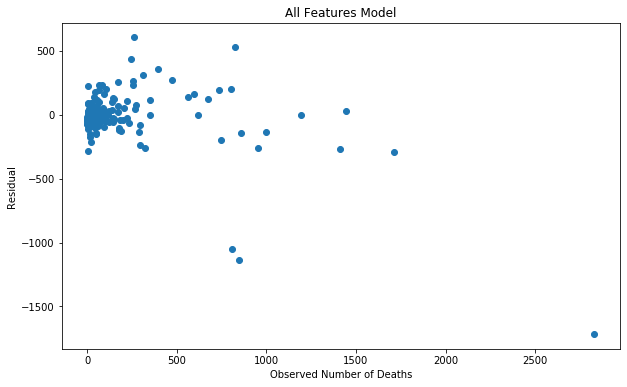

In [1206]:
plt.figure(figsize=(10,6))
resids = preds - y_test
plt.scatter(y_test, resids)
plt.title('All Features Model')
plt.ylabel('Residual')
plt.xlabel('Observed Number of Deaths')

In [1207]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deaths   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     69.51
Date:                Tue, 08 Sep 2020   Prob (F-statistic):          4.91e-227
Time:                        23:25:35   Log-Likelihood:                -3571.6
No. Observations:                 579   AIC:                             7319.
Df Residuals:                     491   BIC:                             7703.
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                         -117.2399    217.264     -0.540      0.590    -544.121     309.641
Total population                                                 0.0027      0.002      1.758      0.079      -0.000       0.006
Male                                                             0.0017      0.002      1.100      0.272      -0.001       0.005
Female                                                           0.0009      0.002      0.528      0.598      -0.003       0.004
Sex ratio (males per 100 females)                                0.6557      1.839      0.357      0.722      -2.957       4.269
Under 5 years                                                   -0.0232      0.011     -2.046      0.041      -0.045      -0.001
5 to 9 years                                                    -0.0359      0.014     -2.585      0.010      -0.063      -0.009
10 to 14 years                                                  -0.0476      0.014     -3.383      0.001      -0.075      -0.020
15 to 19 years                                                   0.0210      0.007      3.158      0.002       0.008       0.034
20 to 24 years                                                   0.0213      0.006      3.444      0.001       0.009       0.033
25 to 34 years                                                   0.0151      0.006      2.444      0.015       0.003       0.027
35 to 44 years                                                   0.0216      0.007      3.259      0.001       0.009       0.035
45 to 54 years                                                   0.0031      0.006      0.516      0.606      -0.009       0.015
55 to 59 years                                                   0.0240      0.007      3.455      0.001       0.010       0.038
60 to 64 years                                                   0.0108      0.007      1.459      0.145      -0.004       0.025
65 to 74 years                                                  -0.0153      0.004     -3.663      0.000      -0.023      -0.007
75 to 84 years                                                  -0.0049      0.005     -1.033      0.302      -0.014       0.004
85 years and over                                                0.0127      0.005      2.721      0.007       0.004       0.022
Median age (years)                                              -0.6797      2.082     -0.326      0.744      -4.771       3.411
Under 18 years                                                   0.0177      0.005      3.746      0.000       0.008       0.027
16 years and over                                               -0.0085      0.011     -0.791      0.429      -0.030

# LASSO Modeling

## Predicting Cases

In [1208]:
y = modeling_data['cases']
X = modeling_data.drop(columns = ['cases', 'cases_lag1', 'deaths'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [1209]:
l1 = Lasso(alpha = 200, max_iter = 10000)
cross_val_score(l1, X_train_sc, y_train).mean()

0.8707955620665924

In [1210]:
l1.fit(X_train_sc, y_train)
print(l1.score(X_train_sc, y_train))
print(l1.score(X_test_sc, y_test))

0.9477182785272821
0.8668335533818242


In [1211]:
# coefficients for lasso model in a dataframe
coef = pd.DataFrame([X_train.columns, l1.coef_]).T
# most relevant features
coef[abs(coef[1]) > 0]

,0,1
15,75 to 84 years,3013.9
16,85 years and over,1961.51
17,Median age (years),-260.36
28,White,1581.47
29,Black or African American,2060.09
37,Hispanic or Latino (of any race),6772.17
41,American Indian and Alaska Native alone,582.297
42,Asian alone,-1895.45
44,Some other race alone,1317.47
47,"Two races excluding Some other race, and Three...",-513.531


The model suggests African Americans and hispanics are disproportionately affected by COVID cases compared to asian and white populations. There are a number of different explanations for this e.g.

- Different responses from different communities. Asian communities in particular might be taking more precautions.
- Income inequality between different groups. Higher income earners tend to have the option of working from home whereas lower income earners do not.

Model also suggests that counties in California and New Mexico tend to have fewer cases. Counties with very high number of cases are those in New York, Louisiana, and Arizona.

Counties with a higher median age tend to have lower number of cases.

High correlation between white population and population of americans older than 75. This suggests that counties that are overwhelmingly white tend to be older compared to counties that are more racially diverse. 

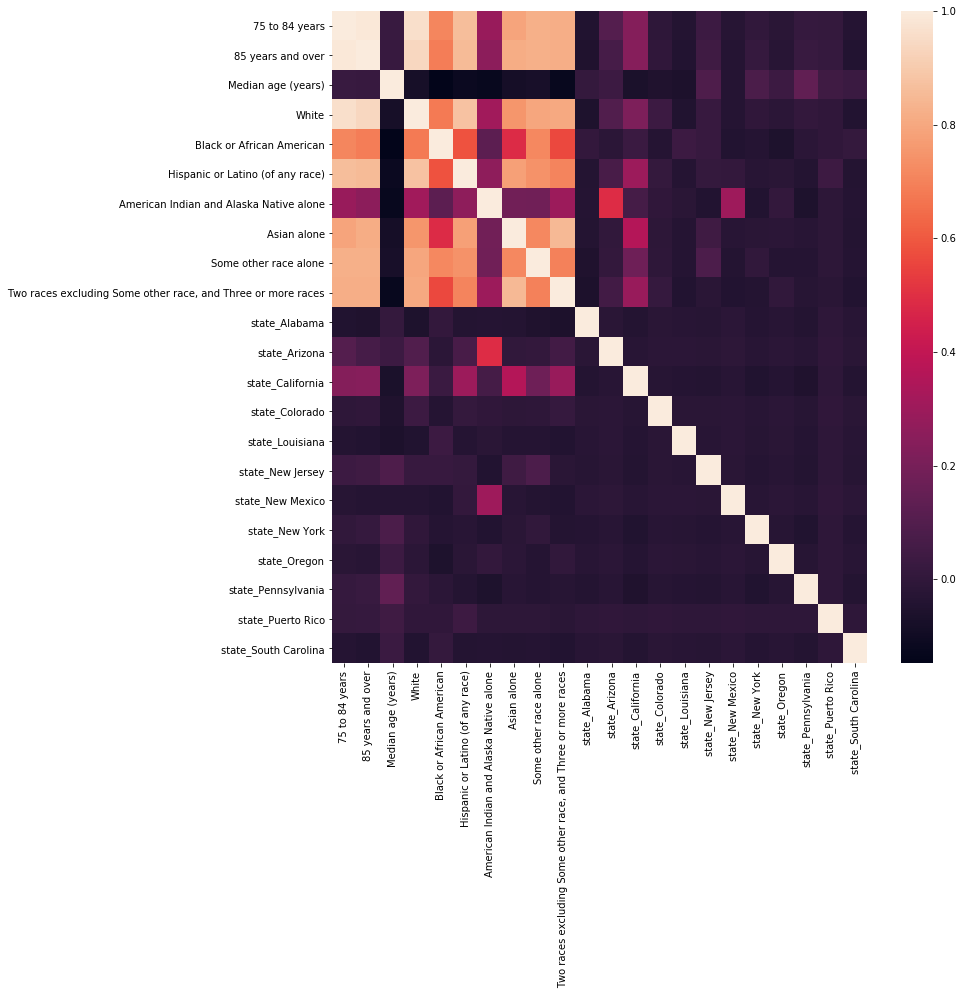

In [1212]:
plt.figure(figsize = (12, 12))
sns.heatmap(modeling_data[list(coef[abs(coef[1]) > 0][0].values)].corr())

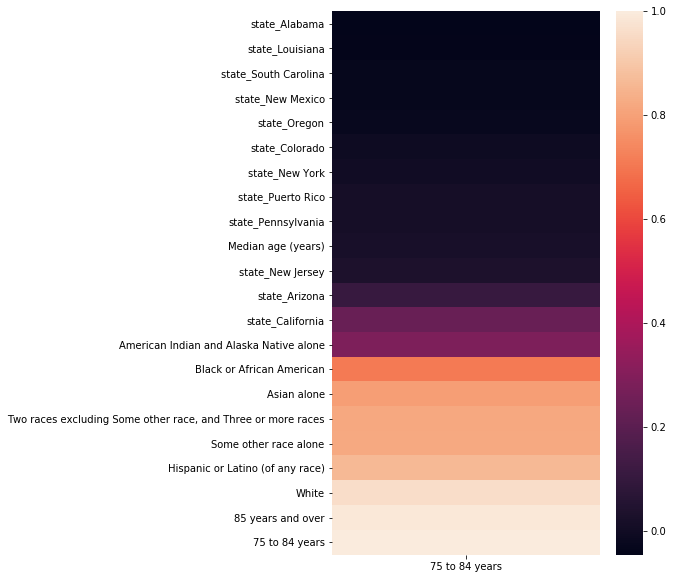

In [1213]:
plt.figure(figsize = (6, 10))
sns.heatmap(modeling_data[list(coef[abs(coef[1]) > 0][0].values)].corr().sort_values('75 to 84 years')[['75 to 84 years']])

There is a high correlation between the age group features and race. We might be able to get away with removing these features. In the next section, we'll creates another linear model with StatsModels and interpret the coefficients.

## Predicting Deaths

In [1214]:
y = modeling_data['deaths']
X = modeling_data.drop(columns = ['cases_lag1', 'deaths'])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

l1 = Lasso(alpha = 3, max_iter = 10000)
print('CV Score:',cross_val_score(l1, X_train_sc, y_train).mean())

l1.fit(X_train_sc, y_train)
print('Train Score:',l1.score(X_train_sc, y_train))
print('Test Score:',l1.score(X_test_sc, y_test))

CV Score: 0.6900772376059942
Train Score: 0.8954811854608201
Test Score: 0.6752211059370077


In [1215]:
coef_deaths = pd.DataFrame([X_train.columns, l1.coef_]).T
coef_deaths[abs(coef_deaths[1]) > 0]

,0,1
3,Sex ratio (males per 100 females),1.49358
16,85 years and over,203.037
17,Median age (years),-4.16331
29,Black or African American,21.4807
30,American Indian and Alaska Native,-9.32944
33,Some other race,63.7663
37,Hispanic or Latino (of any race),-180.409
39,White alone,46.4004
44,Some other race alone,27.012
46,Two races including Some other race,71.6613


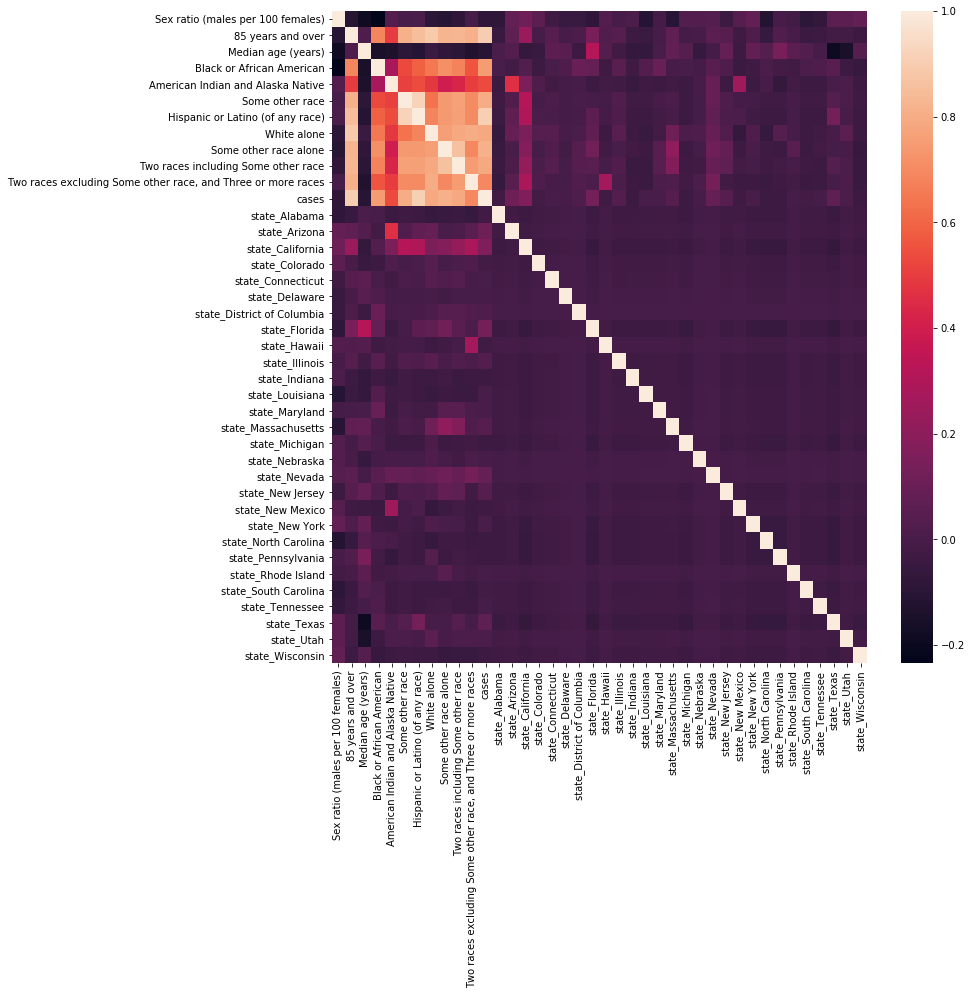

In [1216]:
plt.figure(figsize = (12, 12))
sns.heatmap(modeling_data[list(coef_deaths[abs(coef_deaths[1]) > 0][0].values)].corr())

# 2nd StatsModels Model

 # Predicting Cases

In [1217]:
# Using only relevant features and droping age groups
X = modeling_data[list(coef[abs(coef[1]) > 0][0].values)].drop(columns = ['75 to 84 years', '85 years and over'])
y = modeling_data['cases']

In [1218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

model = sm.OLS(y_train, sm.add_constant(X_train))
res = model.fit()

preds = res.predict(sm.add_constant(X_test))
print('R2:',r2_score(y_test, preds))
print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))

R2: 0.8465459106599328
RMSE: 3019.6964410506434


In [1219]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     461.2
Date:                Tue, 08 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:25:39   Log-Likelihood:                -5541.4
No. Observations:                 579   AIC:                         1.112e+04
Df Residuals:                     558   BIC:                         1.122e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                        -1353.3953   1274.983     -1.062      0.289   -3857.748    1150.957
Median age (years)                                              13.6702     32.394      0.422      0.673     -49.960      77.300
White                                                            0.0138      0.001     11.668      0.000       0.011       0.016
Black or African American                                        0.0229      0.002      9.444      0.000       0.018       0.028
Hispanic or Latino (of any race)                                 0.0284      0.001     19.659      0.000       0.026       0.031
American Indian and Alaska Native alone                          0.1574      0.044      3.609      0.000       0.072       0.243
Asian alone                                                     -0.0226      0.004     -5.024      0.000      -0.031      -0.014
Some other race alone                                            0.8494      0.126      6.726      0.000       0.601       1.097
Two races excluding Some other race, and Three or more races    -0.0477      0.021     -2.326      0.020      -0.088      -0.007
state_Alabama                                                 1505.6914    935.108      1.610      0.108    -331.070    3342.453
state_Arizona                                                 2499.6061   1577.007      1.585      0.114    -597.989    5597.202
state_California                                             -2628.0105    726.443     -3.618      0.000   -4054.907   -1201.114
state_Colorado                                               -3247.3530   1201.051     -2.704      0.007   -5606.486    -888.220
state_Louisiana                                               2566.3200   1040.226      2.467      0.014     523.083    4609.557
state_New Jersey                                              1527.5971    870.278      1.755      0.080    -181.824    3237.018
state_New Mexico                                             -4196.1392   1495.840     -2.805      0.005   -7134.305   -1257.974
state_New York                                                1652.8215    762.658      2.167      0.031     154.790    3150.853
state_Oregon                                                 -1696.1714   1084.579     -1.564      0.118   -3826.529     434.186
state_Pennsylvania                                            -863.5171    741.337     -1.165      0.245   -2319.669     592.635
state_Puerto Rico                                            -8712.8037   3565.538     -2.444      0.015   -1.57e+04   -1709.288
state_South Carolina                                          1370.1886    854.910      1.603      0.110    -309.047

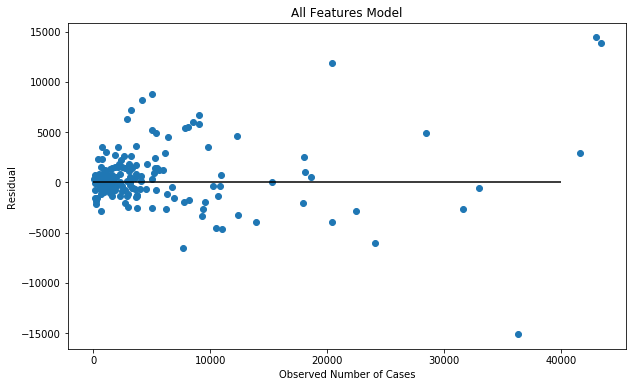

In [1220]:
plt.figure(figsize=(10,6))
resids = preds - y_test
plt.scatter(y_test, resids)
plt.title('All Features Model')
plt.ylabel('Residual')
plt.xlabel('Observed Number of Cases')
plt.hlines(y = 0, xmin = 0, xmax = 40000)

# Predicting Deaths

In [1221]:
X = modeling_data[coef_deaths[abs(coef_deaths[1]) > 0][0].values]
y = modeling_data['deaths']

In [1222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

model = sm.OLS(y_train, sm.add_constant(X_train))
res = model.fit()

preds = res.predict(sm.add_constant(X_test))
print('R2:',r2_score(y_test, preds))
print('RMSE:', np.sqrt(mean_squared_error(y_test, preds)))

R2: 0.6556392632130406
RMSE: 195.8406444755874


In [1223]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 deaths   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     124.9
Date:                Tue, 08 Sep 2020   Prob (F-statistic):          1.89e-244
Time:                        23:25:39   Log-Likelihood:                -3646.5
No. Observations:                 579   AIC:                             7375.
Df Residuals:                     538   BIC:                             7554.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
================================================================================================================================
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------
const                                                          -71.0918    157.868     -0.450      0.653    -381.206     239.022
Sex ratio (males per 100 females)                                1.1639      1.407      0.827      0.408      -1.600       3.928
85 years and over                                                0.0174      0.002      8.163      0.000       0.013       0.022
Median age (years)                                              -2.4236      1.517     -1.598      0.111      -5.404       0.556
Black or African American                                        0.0002      0.000      1.395      0.163   -6.38e-05       0.000
American Indian and Alaska Native                               -0.0038      0.002     -2.369      0.018      -0.007      -0.001
Some other race                                                  0.0015      0.000      7.526      0.000       0.001       0.002
Hispanic or Latino (of any race)                                -0.0012      0.000    -10.973      0.000      -0.001      -0.001
White alone                                                      0.0002   7.21e-05      3.199      0.001    8.89e-05       0.000
Some other race alone                                            0.0058      0.006      0.918      0.359      -0.007       0.018
Two races including Some other race                              0.0816      0.016      5.015      0.000       0.050       0.114
Two races excluding Some other race, and Three or more races    -0.0071      0.001     -8.181      0.000      -0.009      -0.005
cases                                                            0.0211      0.002     11.274      0.000       0.017       0.025
state_Alabama                                                  -36.9145     37.144     -0.994      0.321    -109.879      36.050
state_Arizona                                                   97.9180     63.589      1.540      0.124     -26.996     222.832
state_California                                               -20.9417     29.532     -0.709      0.479     -78.954      37.071
state_Colorado                                                  75.8114     47.368      1.600      0.110     -17.238     168.861
state_Connecticut                                              215.1332     53.344      4.033      0.000     110.345     319.922
state_Delaware                                                  43.9966     79.882      0.551      0.582    -112.923     200.916
state_District of Columbia                                     116.1669    138.932      0.836      0.403    -156.749     389.083
state_Florida                                                 -160.3447     29.120     -5.506      0.000    -217.548

Text(0.5, 0, 'Observed Number of Deaths')

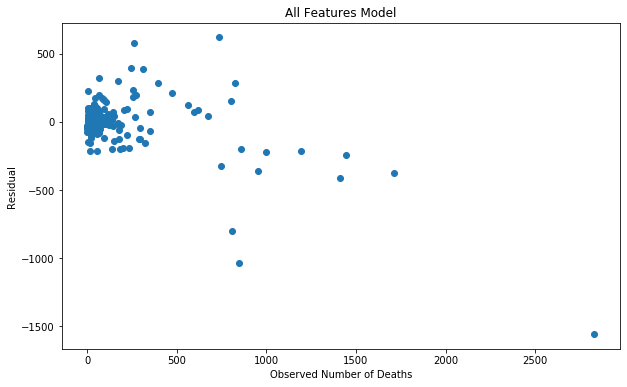

In [1224]:
plt.figure(figsize=(10,6))
resids = preds - y_test
plt.scatter(y_test, resids)
plt.title('All Features Model')
plt.ylabel('Residual')
plt.xlabel('Observed Number of Deaths')

### Demographic Inferences:
- There is some evidence to suggest that COVID is more lethal for men.
- Similar coefficients suggest that the lethality of the COVID is the same across different racial groups
- Lower Median age in a county correlates to lower number of deaths
- Higher number of cases correlates to more deaths (this one's obvious)

### State Coeficients:

- Positive: Connecticut, Hawaii, Massachusetts, New Jersey
- Negative: Florida
    
There may be something about Florida's state policies that may be reducing" COVID fatalities. 